In [1]:
import os
import torch
from torchvision import transforms

from fashionmnist.data_setup import create_dataloaders
from fashionmnist.eval import eval_model

/home/reynald/.cache/pypoetry/virtualenvs/fashionmnist-Tzki-XrV-py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Check if a GPU is accessible

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Define some parameters

In [3]:
save_model_path = "../models"
data_path='../data/'

Get the test dataloader and the class names

In [4]:
_, _, test_dataloader, class_names = create_dataloaders(
    data_path=data_path,
    train_ratio=0.5, #any value can work here
    transforms=transforms.ToTensor(),
    batch_size=1 #the batch size defined here does not influence the batch size for the test dataloader
)

Get the list of all the pth models in `save_model_path`

In [5]:
models_file = [f for f in os.listdir(save_model_path) 
               if os.path.isfile(os.path.join(save_model_path, f))]
print(models_file)

['Conv2LayersNetwork_hidden_units=10.pth', 'Conv2LayersNetwork_hidden_units=50.pth', 'FCNetwork_hidden_units=10.pth', 'FCNetwork_hidden_units=50.pth']


Get the accuracy, the confusion matrix and a set of misclassified instances for each model

Evaluating Conv2LayersNetwork_hidden_units=10.pth


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:14<00:00, 679.08it/s]


Test accuracy: 0.8826


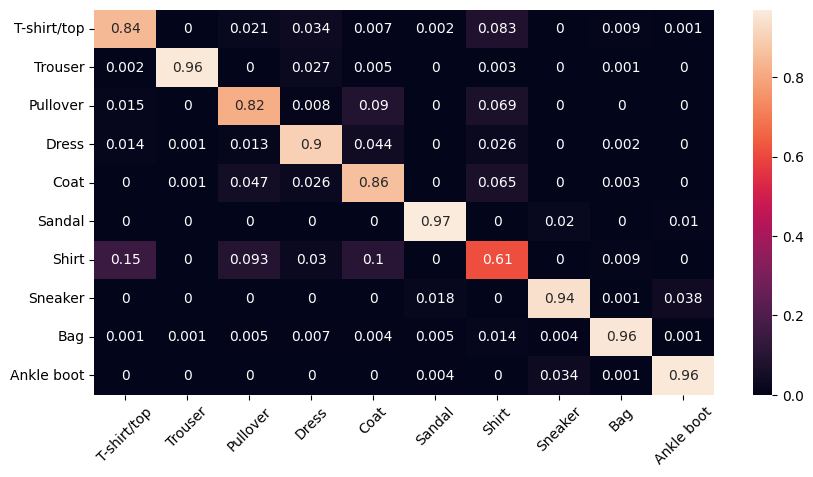

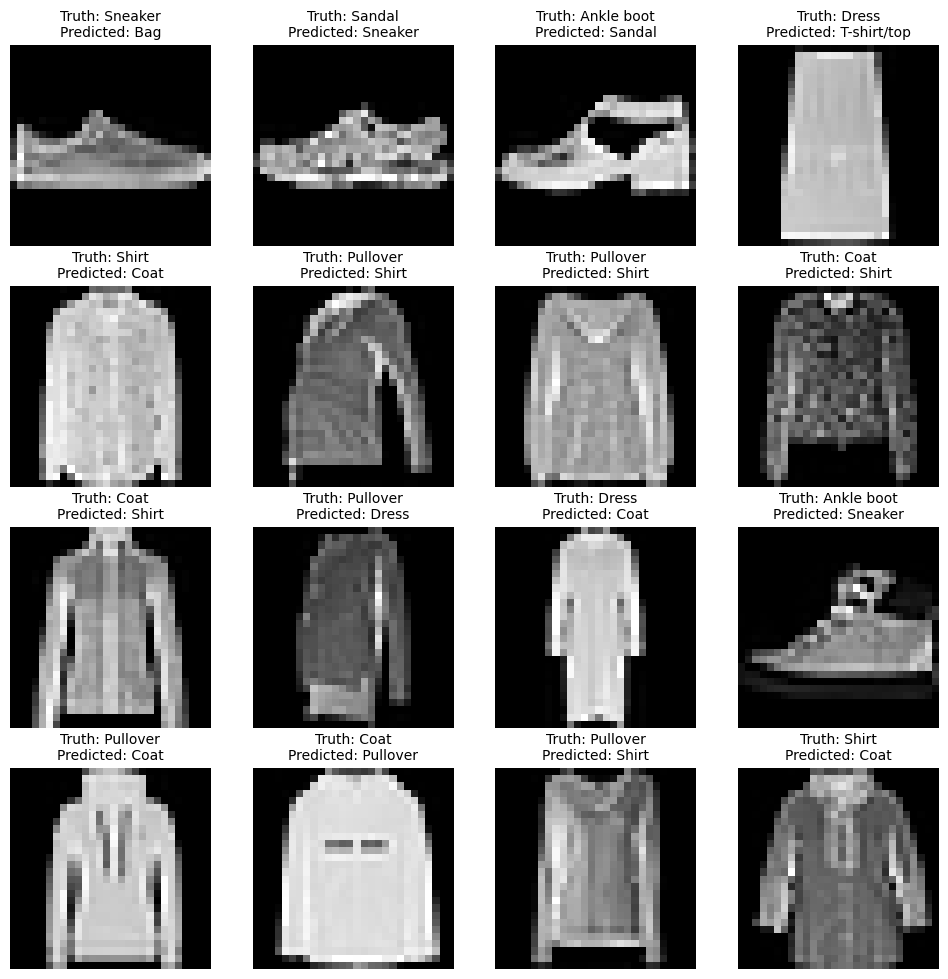


--------------------

Evaluating Conv2LayersNetwork_hidden_units=50.pth


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:14<00:00, 687.93it/s]


Test accuracy: 0.8989


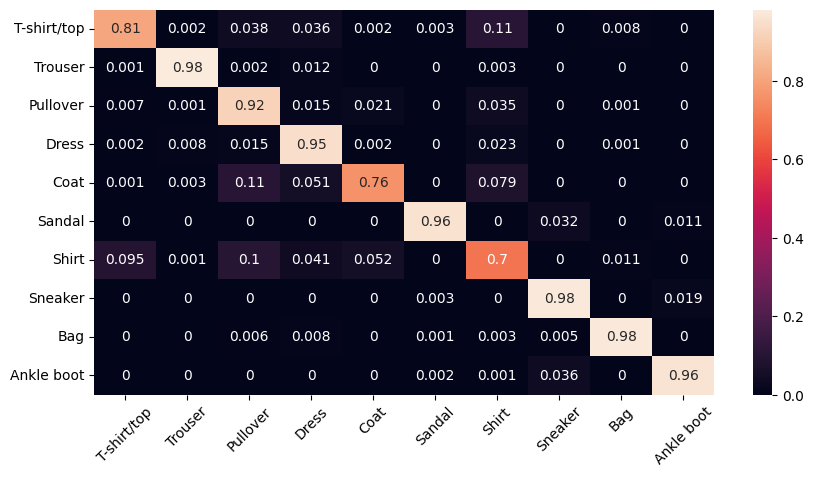

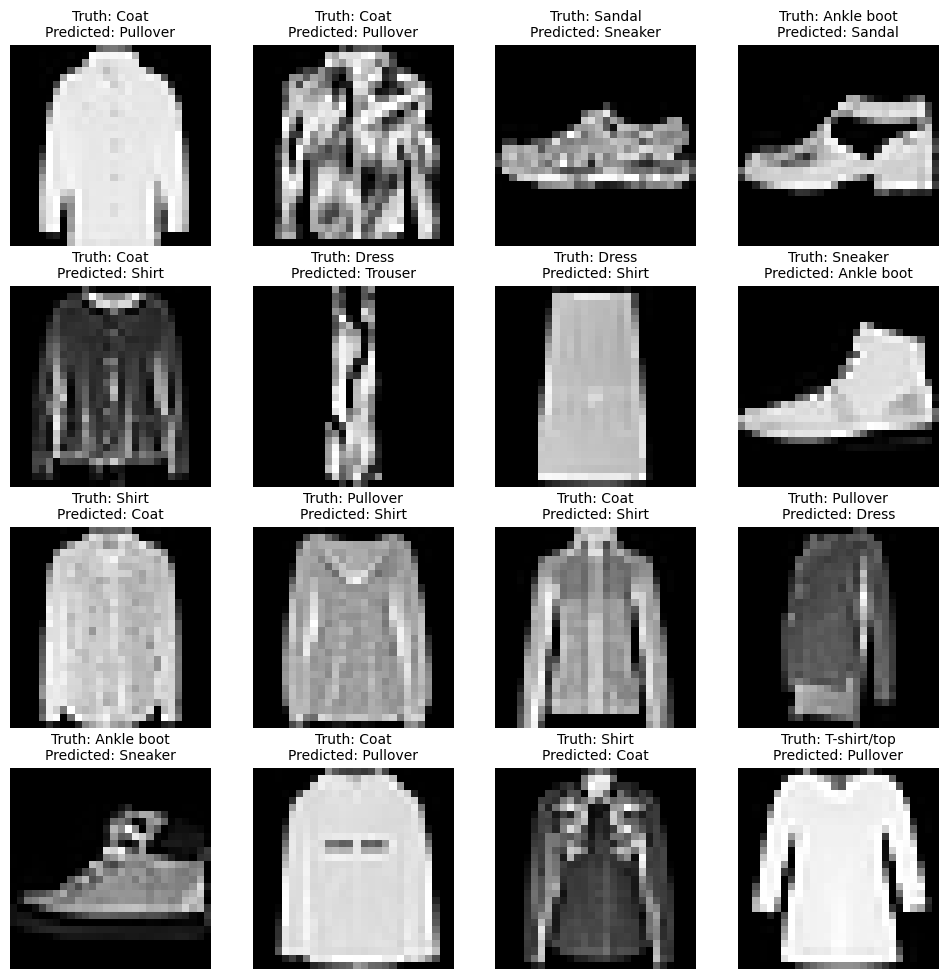


--------------------

Evaluating FCNetwork_hidden_units=10.pth


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:10<00:00, 928.80it/s]


Test accuracy: 0.8483


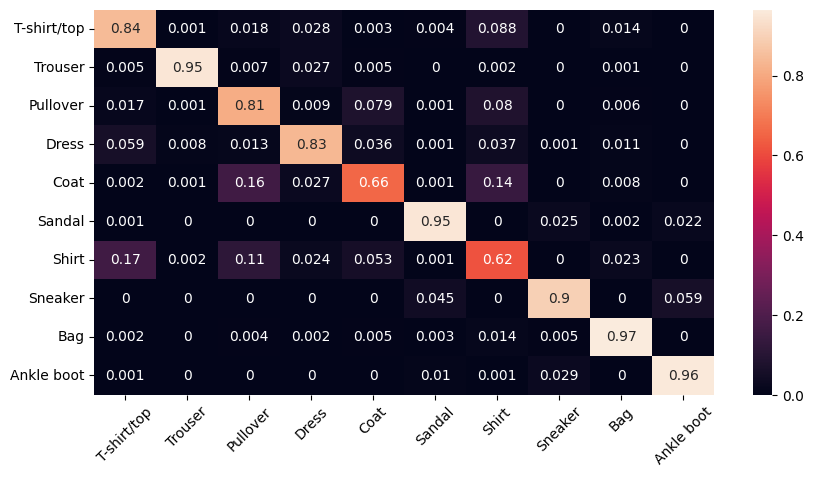

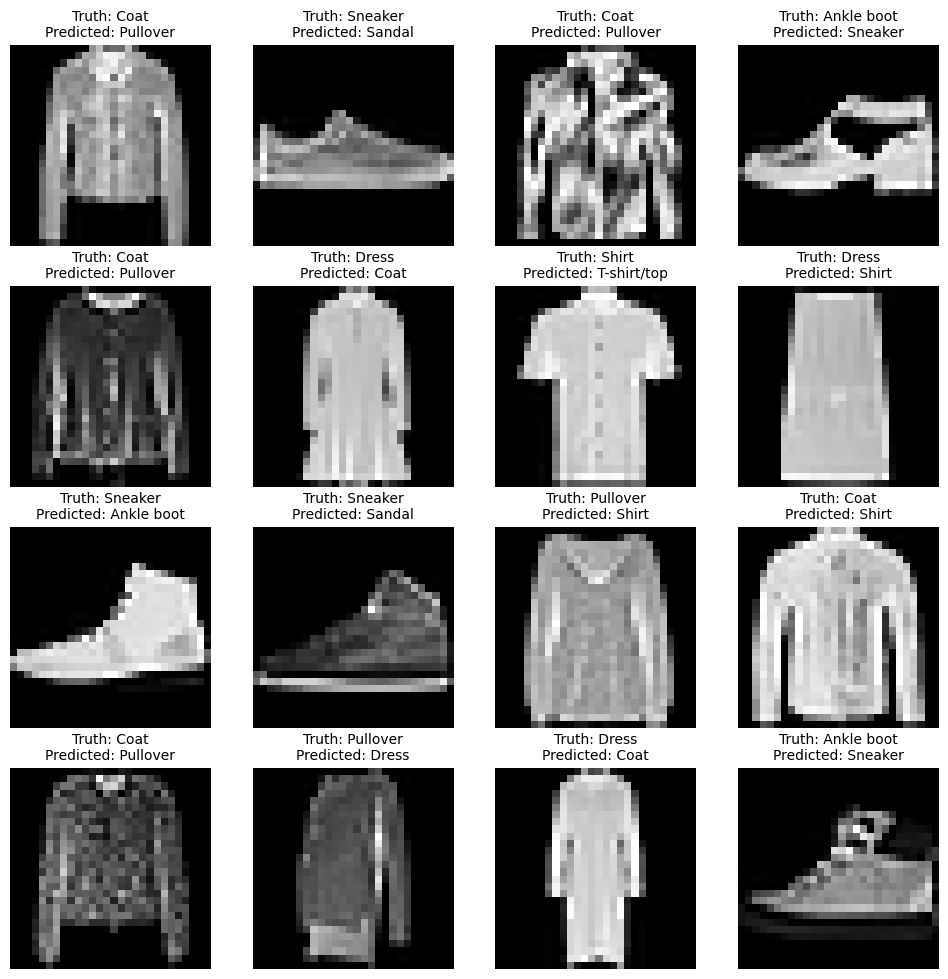


--------------------

Evaluating FCNetwork_hidden_units=50.pth


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:10<00:00, 911.14it/s]


Test accuracy: 0.8786


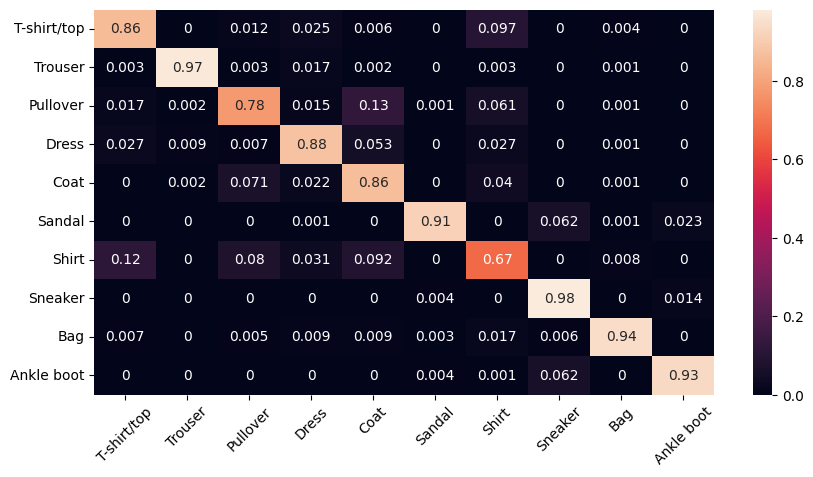

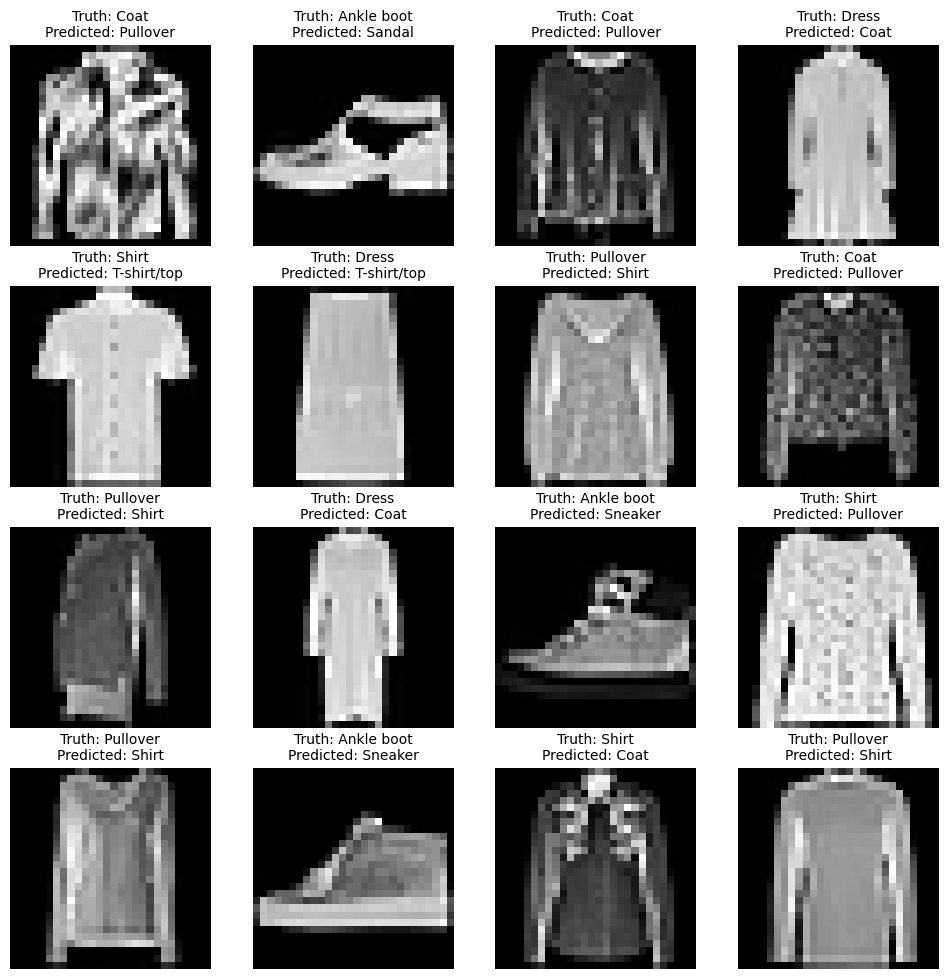


--------------------



In [6]:
for model_file in models_file:
    eval_model(model_file, test_dataloader, class_names, save_model_path, device, plot=True)
    print('\n--------------------\n')